Data loaded successfully from 'PCB.dt'.

--- Task 1: Implementation Complete ---
Linear regression function `fit_linear_regression` is ready.

--- Task 2: Model 1 Results ---
Model: h(x) = exp(ax + b)
  Parameter a (slope): 0.2591
  Parameter b (intercept): 0.0315
  Mean-Squared-Error (on original S): 34.8356

--- Task 3: Counterexample ---
Using points (1, 2) and (1, 4):
  Fit on log scale (argmin of (ln(2)-b)^2 + (ln(4)-b)^2):
  b = (ln(2) + ln(4)) / 2 = 1.0397
  This corresponds to h(x) = exp(1.0397) = 2.8284
  Fit on original scale (argmin of (2-h)^2 + (4-h)^2):
  h = (2 + 4) / 2 = 3.0000
  Since 2.8284 != 3.0000, the parameters that
  minimize the log-error are NOT the same as those
  that minimize the original squared error.

--- Task 4: Plot for Model 1 generated ---
Saved as 'model_1_plot.png'

--- Task 5: R-squared for Model 1 ---
R^2 (on original y values): 0.3570
Discussion:
  - R^2 = 1: Perfect fit. The model's predictions (h(x)) exactly match the true data (y).
  - R^2 = 0

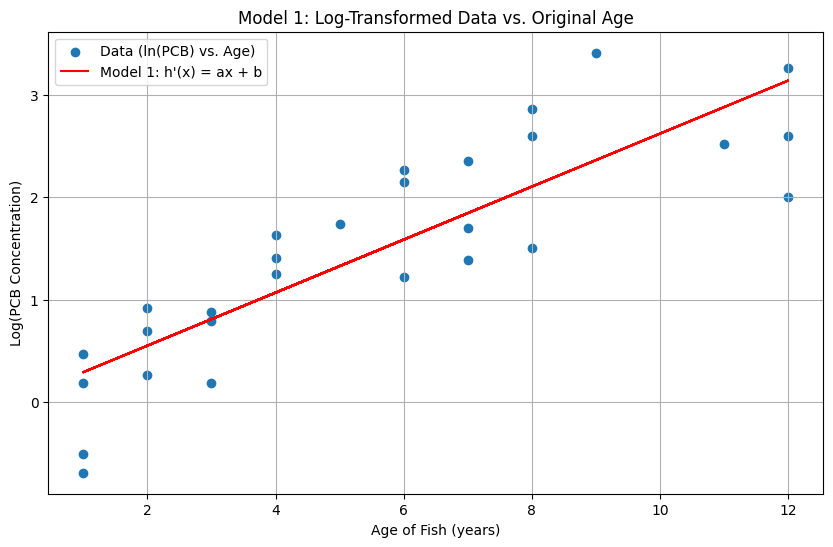

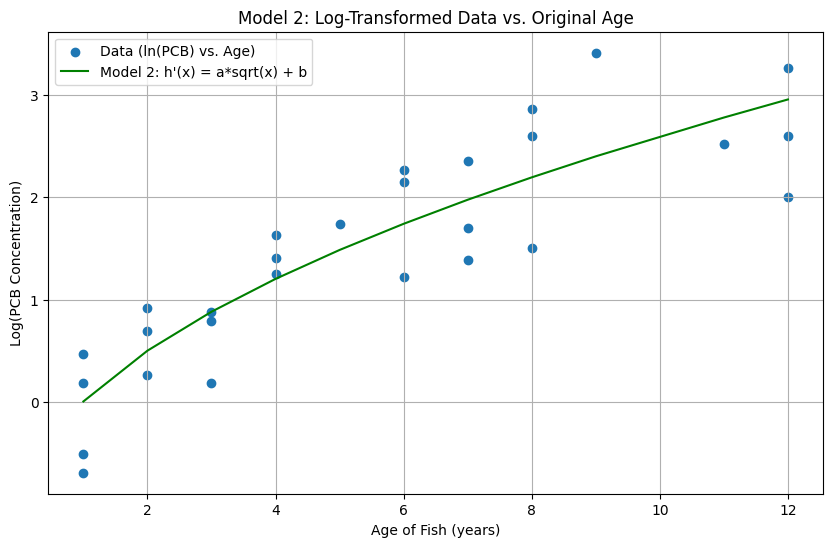

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# PART 0: Load Data
# -----------------------------------------------------------------
# Load the file
data_file = "PCB.dt"
try:
    data = np.loadtxt(data_file)
    print("Data loaded successfully from 'PCB.dt'.")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please make sure 'PCB.dt' is uploaded correctly.")

# Separate into input (x) and output (y)
# Reshape x to be a column vector (N, 1) for our functions
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]
y_log = np.log(y) # We'll need this for almost everything

# -----------------------------------------------------------------
# TASK 1: Implement Linear Regression
# -----------------------------------------------------------------
def fit_linear_regression(X, y):
    """
    Fits a linear regression model h(x) = w0 + w1*x1 + ...
    using the Normal Equation: w = (X_b.T @ X_b)^-1 @ X_b.T @ y

    Args:
        X (np.array): Input features (N, d). Must be a 2D array.
        y (np.array): Target values (N,).

    Returns:
        np.array: Weight vector w (including bias w0).
    """
    # Add the bias term (column of ones) to X
    # np.c_ is a simple way to concatenate columns
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate weights using the Normal Equation
    # np.linalg.inv is for matrix inversion
    # @ is for matrix multiplication
    try:
        weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    except np.linalg.LinAlgError:
        print("Error: Singular matrix. Could not compute inverse.")
        return None

    return weights # weights[0] is b (intercept), weights[1] is a (slope)

# Define helper functions for error calculation
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_res = np.sum(np.square(y_true - y_pred)) # Residual Sum of Squares
    ss_tot = np.sum(np.square(y_true - np.mean(y_true))) # Total Sum of Squares
    return 1 - (ss_res / ss_tot)

print("\n--- Task 1: Implementation Complete ---")
print(f"Linear regression function `fit_linear_regression` is ready.\n")

# -----------------------------------------------------------------
# TASK 2: Build Model 1: h(x) = exp(ax + b)
# -----------------------------------------------------------------
# We fit h'(x) = ax + b to S' = (x, ln(y))
weights_model1 = fit_linear_regression(x, y_log)
b1 = weights_model1[0]
a1 = weights_model1[1]

# This is h'(x) = ax + b
h_prime_model1 = b1 + a1 * x.ravel()

# This is the final model h(x) = exp(h'(x))
h_model1 = np.exp(h_prime_model1)

# Calculate MSE on the *original* training data S
mse_model1 = mse(y, h_model1)

print("--- Task 2: Model 1 Results ---")
print(f"Model: h(x) = exp(ax + b)")
print(f"  Parameter a (slope): {a1:.4f}")
print(f"  Parameter b (intercept): {b1:.4f}")
print(f"  Mean-Squared-Error (on original S): {mse_model1:.4f}\n")

# -----------------------------------------------------------------
# TASK 3: Counterexample
# -----------------------------------------------------------------
# Per the hint, use two points: (x1, y1) and (x1, y2)
# Let's use (1, 2) and (1, 4)
y_example = np.array([2, 4])
y_log_example = np.log(y_example)

# Case 1: Minimize error on log scale (as we did in Task 2)
# We fit b to ln(y), so b is just the mean of ln(y)
# (ax is constant since x is constant)
b_log_fit = np.mean(y_log_example)
print("--- Task 3: Counterexample ---")
print(f"Using points (1, 2) and (1, 4):")
print(f"  Fit on log scale (argmin of (ln(2)-b)^2 + (ln(4)-b)^2):")
print(f"  b = (ln(2) + ln(4)) / 2 = {b_log_fit:.4f}")
print(f"  This corresponds to h(x) = exp({b_log_fit:.4f}) = {np.exp(b_log_fit):.4f}")

# Case 2: Minimize error on original scale
# We fit h to y, so h is just the mean of y
# (h = exp(b) is constant)
h_orig_fit = np.mean(y_example)
print(f"  Fit on original scale (argmin of (2-h)^2 + (4-h)^2):")
print(f"  h = (2 + 4) / 2 = {h_orig_fit:.4f}")
print(f"  Since {np.exp(b_log_fit):.4f} != {h_orig_fit:.4f}, the parameters that")
print(f"  minimize the log-error are NOT the same as those")
print(f"  that minimize the original squared error.\n")


# -----------------------------------------------------------------
# TASK 4: Plot Model 1
# -----------------------------------------------------------------
plt.figure(figsize=(10, 6))
# Plot the data: log(y) vs x
plt.scatter(x, y_log, label='Data (ln(PCB) vs. Age)')
# Plot the model: h'(x) vs x
plt.plot(x, h_prime_model1, color='red', label='Model 1: h\'(x) = ax + b')
plt.title('Model 1: Log-Transformed Data vs. Original Age')
plt.xlabel('Age of Fish (years)')
plt.ylabel('Log(PCB Concentration)')
plt.legend()
plt.grid(True)
plt.savefig('model_1_plot.png')
print("--- Task 4: Plot for Model 1 generated ---")
print("Saved as 'model_1_plot.png'\n")
# plt.show() # Uncomment to display plot

# -----------------------------------------------------------------
# TASK 5: R-squared for Model 1
# -----------------------------------------------------------------
# R^2 is calculated on the *original* y and h(x)
r2_model1 = r_squared(y, h_model1)

print("--- Task 5: R-squared for Model 1 ---")
print(f"R^2 (on original y values): {r2_model1:.4f}")
print("Discussion:")
print("  - R^2 = 1: Perfect fit. The model's predictions (h(x)) exactly match the true data (y).")
print("  - R^2 = 0: The model is no better than just guessing the mean (y_bar).")
print("  - Can R^2 be negative? Yes. It means your model is *worse* than just guessing")
print("    the mean. This can happen with non-linear models or models that are")
print("    fit on a different objective (like our log-transformed one).\n")


# -----------------------------------------------------------------
# TASK 6: Build Model 2: h(x) = exp(a*sqrt(x) + b)
# -----------------------------------------------------------------
# We fit h'(x) = a*sqrt(x) + b to S'' = (sqrt(x), ln(y))
x_sqrt = np.sqrt(x)
weights_model2 = fit_linear_regression(x_sqrt, y_log)
b2 = weights_model2[0]
a2 = weights_model2[1]

# This is h'(x) = a*sqrt(x) + b
h_prime_model2 = b2 + a2 * x_sqrt.ravel()

# This is the final model h(x) = exp(h'(x))
h_model2 = np.exp(h_prime_model2)

# Calculate MSE on the *original* training data S
mse_model2 = mse(y, h_model2)

# Calculate R^2 on the *transformed labels* as requested
r2_model2_transformed = r_squared(y_log, h_prime_model2)

print("--- Task 6: Model 2 Results & Comparison ---")
print(f"Model: h(x) = exp(a*sqrt(x) + b)")
print(f"  Parameter a (slope): {a2:.4f}")
print(f"  Parameter b (intercept): {b2:.4f}")
print(f"  Mean-Squared-Error (on original S): {mse_model2:.4f}")
print(f"  R^2 (on *transformed* y_log): {r2_model2_transformed:.4f}\n")

# Plot Model 2 (y_log vs. original x)
plt.figure(figsize=(10, 6))
plt.scatter(x, y_log, label='Data (ln(PCB) vs. Age)')
# We must sort the x values for a clean plot line
sort_indices = np.argsort(x.ravel())
plt.plot(x[sort_indices], h_prime_model2[sort_indices], color='green', label='Model 2: h\'(x) = a*sqrt(x) + b')
plt.title('Model 2: Log-Transformed Data vs. Original Age')
plt.xlabel('Age of Fish (years)')
plt.ylabel('Log(PCB Concentration)')
plt.legend()
plt.grid(True)
plt.savefig('model_2_plot.png')
print("--- Task 6: Plot for Model 2 generated ---")
print("Saved as 'model_2_plot.png'\n")
# plt.show() # Uncomment to display plot

# Final Comparison
# We must also calculate R^2 for Model 1 on the *transformed* labels
# so we can make a fair comparison with Model 2's R^2
r2_model1_transformed = r_squared(y_log, h_prime_model1)

print("--- Final Model Comparison ---")
print("Comparing models based on R^2 of the log-transformed data:")
print(f"  Model 1 (ax+b) R^2:         {r2_model1_transformed:.4f}")
print(f"  Model 2 (a*sqrt(x)+b) R^2: {r2_model2_transformed:.4f}")
if r2_model2_transformed > r2_model1_transformed:
    print("  Result: Model 2 is a better fit on the log-transformed data.")
else:
    print("  Result: Model 1 is a better fit on the log-transformed data.")